<a href="https://colab.research.google.com/github/manjari-cse/Image-processing/blob/main/letter_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

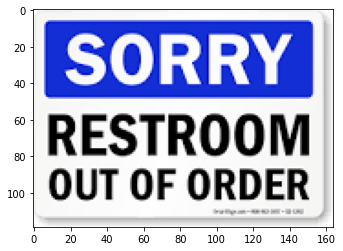

ValueError: ignored

In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import os
from PIL import Image
import pytesseract

img1 = cv2.imread('/content/download (1).png')
plt.imshow(img1)
plt.show()
img1 = cv2.resize(img1, (600,800));
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)


ret,thresh1 = cv2.threshold(img,127,255,0)
cons, contours, sd = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# cnt = contours[1019]
print(len(contours))
# cv2.drawContours(img1, contours, -1, (0,255,0), 3)

# x,y,w,h = cv2.boundingRect(cnt)
# cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)

a,b,max_w,max_h = cv2.boundingRect(contours[500])
max_x = 0
max_y = 0

for i in range(0,len(contours)):
    cnt = contours[i];
    x,y,w,h = cv2.boundingRect(cnt)
    if max_h*max_w < w*h:
        max_h = h
        max_w = w
        max_a = x
        max_b = y

_,_,second_max_w,second_max_h = cv2.boundingRect(contours[500])

second_max_x = 0
second_max_y = 0
for i in range(0,len(contours)):
    cnt = contours[i];
    x,y,w,h = cv2.boundingRect(cnt)
    if second_max_h*second_max_w < w*h and w != max_w and h != max_h :
        second_max_h = h
        second_max_w = w
        second_max_a = x
        second_max_b = y

cv2.rectangle(img1,(max_a,max_b),(max_a+max_w,max_b+max_h),(0,255,255),2)
cv2.rectangle(img1,(second_max_a,second_max_b),(second_max_a+second_max_w,second_max_b+second_max_h),(0,255,0),2)

card = img1[max_b:max_b+max_h,max_a:max_a+max_w]
name_area = thresh1[second_max_b:second_max_b+second_max_h,second_max_a:second_max_a+second_max_w]

# print("xcoord {} ycoord {} height {} width {}".format(max_a,max_b,max_h,max_w))

cv2.imwrite('name.png',cv2.bitwise_not(name_area))
r = Image.open('name.png')
r.load()
text = pytesseract.image_to_string(r)
os.remove('name.png')
print(text)

In [ ]:
pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.4-py2.py3-none-any.whl size=13431 sha256=a731d3b959fa6be95813eaf3ba867204d7cdb2411bb4faf1b6bb7ab6317edf96
  Stored in directory: /root/.cache/pip/wheels/63/2a/a0/7596d2e0a73cf0aeffd6f6170862c4e73f3763b7827e48691a
Successfully built pytesseract
